In [4]:
import pandas as pd 
df= pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Employee Attrition/Cleaned_Employee_Attrition.csv")

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
1,33,No,Travel Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
2,32,No,Travel Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
3,29,No,Travel Rarely,153,Research & Development,15,2,Life Sciences,15,4,...,3,4,0,10,3,3,9,5,0,8
4,31,No,Travel Rarely,670,Research & Development,26,1,Life Sciences,16,1,...,3,4,1,5,1,2,5,2,4,3


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_correlation(df):
   
    # Attempt to convert all columns to numeric, handling errors
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') 

    
    df = df.select_dtypes(include=['number'])

    if df.empty:
        print("No numeric columns found in the DataFrame.")
        return

    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Feature Correlation Matrix")
    plt.show()

   





Attrition
No     577
Yes    122
Name: count, dtype: int64


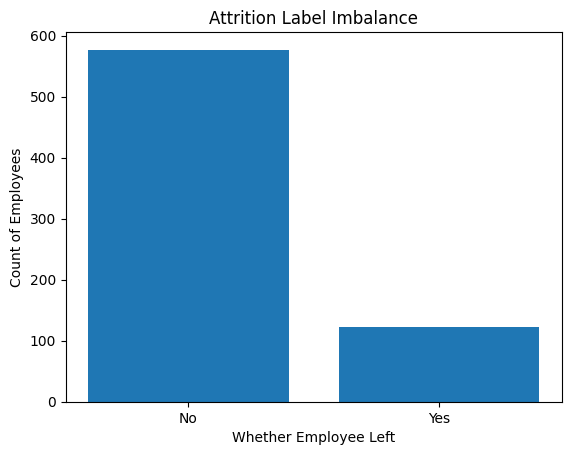

In [5]:
#Check if it's an imbalance dataset
# Count of unique values in Attrition column
attrition_values = df['Attrition'].value_counts()
print(attrition_values)

# Plot barplot
plt.bar(attrition_values.index, attrition_values.values)
plt.title('Attrition Label Imbalance')
plt.xlabel('Whether Employee Left')
plt.ylabel('Count of Employees')
plt.show()

In [6]:
summary = df.describe()
print(summary)

              Age    DailyRate  DistanceFromHome   Education  EmployeeNumber  \
count  699.000000   699.000000        699.000000  699.000000      699.000000   
mean    34.895565   807.708155          9.367668    2.864092     1034.693848   
std      8.446306   399.049179          8.168051    1.033874      603.889794   
min     18.000000   103.000000          1.000000    1.000000        4.000000   
25%     29.000000   471.000000          2.000000    2.000000      499.000000   
50%     34.000000   812.000000          7.000000    3.000000     1013.000000   
75%     40.000000  1159.500000         15.000000    4.000000     1566.000000   
max     60.000000  1498.000000         29.000000    5.000000     2068.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               699.000000  699.000000      699.000000  699.000000   
mean                  2.719599   65.942775        2.731044    1.696710   
std                   1.093771   20.458908        0.71158

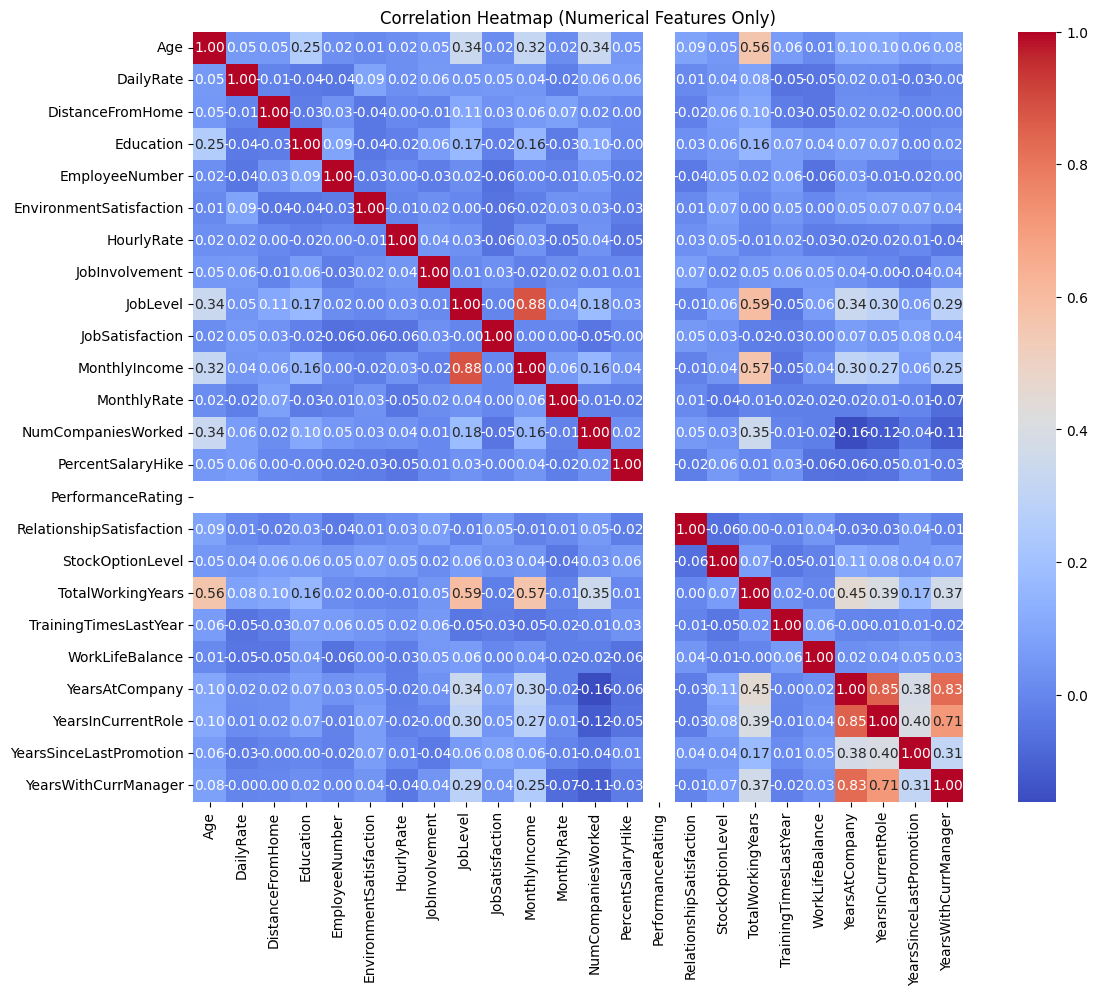

In [ ]:
#correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
# Convert 'Attrition' to numeric if it's still a string
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# Now split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Attrition'])


In [12]:
print("Attrition train")
print(train_df['Attrition'].value_counts()/len(train_df))
print("Attrition test")
print(test_df['Attrition'].value_counts()/len(test_df))

Attrition train
Attrition
0    0.824687
1    0.175313
Name: count, dtype: float64
Attrition test
Attrition
0    0.828571
1    0.171429
Name: count, dtype: float64


In [7]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating a new DataFrame with only categorical columns
categorical = df[categorical_columns]

# Printing the categorical DataFrame
print(categorical.head())

  Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel Rarely  Research & Development          Other    Male   
1        No  Travel Frequently  Research & Development  Life Sciences  Female   
2        No  Travel Frequently  Research & Development  Life Sciences    Male   
3        No      Travel Rarely  Research & Development  Life Sciences  Female   
4        No      Travel Rarely  Research & Development  Life Sciences    Male   

                 JobRole MaritalStatus OverTime  
0  Laboratory Technician        Single      Yes  
1     Research Scientist       Married      Yes  
2  Laboratory Technician        Single       No  
3  Laboratory Technician        Single      Yes  
4     Research Scientist      Divorced       No  


In [13]:
# Ensure categorical contains only column names, not the entire DataFrame
categorical_columns = categorical.columns  

# Create dummy variables for categorical features in the test set
test_dummy = pd.get_dummies(test_df[categorical_columns], drop_first=True)

# Display the first few rows
test_dummy.head()

,Attrition,BusinessTravel_Travel Frequently,BusinessTravel_Travel Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
628,1,False,True,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
692,0,False,True,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
311,0,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
302,0,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
657,1,False,True,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [14]:
# Concat encoded features
test_df = pd.concat([test_df, test_dummy], axis=1)
# Drop original categorical columns
test_df.drop(columns = categorical, inplace=True)
test_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
628,32,414,2,4,1862,3,82,2,2,2,...,False,False,False,False,False,True,False,False,True,True
692,29,468,28,4,2054,4,73,2,1,1,...,False,False,False,False,True,False,False,False,True,False
311,39,1383,2,3,909,4,42,2,2,4,...,False,False,False,False,False,False,False,True,False,False
302,24,1269,4,1,888,1,46,2,1,4,...,True,False,False,False,False,False,False,True,False,False
657,28,1404,17,3,1960,3,32,2,1,4,...,True,False,False,False,False,False,False,False,False,False


In [15]:
# Rename target column
test_df.rename(columns={'Attrition_Yes': 'attrition'}, inplace=True)
test_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
628,32,414,2,4,1862,3,82,2,2,2,...,False,False,False,False,False,True,False,False,True,True
692,29,468,28,4,2054,4,73,2,1,1,...,False,False,False,False,True,False,False,False,True,False
311,39,1383,2,3,909,4,42,2,2,4,...,False,False,False,False,False,False,False,True,False,False
302,24,1269,4,1,888,1,46,2,1,4,...,True,False,False,False,False,False,False,True,False,False
657,28,1404,17,3,1960,3,32,2,1,4,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
#To bring all features to the same scale
from sklearn.preprocessing import StandardScaler

#Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

#review the scaled data
print("Preview of scaled numerical features:")
print(df_scaled[num_cols].head())


Preview of scaled numerical features:
        Age  Attrition  DailyRate  DistanceFromHome  Education  \
0  0.249333   2.174743   1.417611         -0.902656  -0.836379   
1 -0.224586  -0.459824   1.465259         -0.780141   1.099478   
2 -0.343066  -0.459824   0.494759         -0.902656  -0.836379   
3 -0.698505  -0.459824  -1.641845          0.690050  -0.836379   
4 -0.461546  -0.459824  -0.345338          2.037725  -1.804308   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0       -1.707980                 1.171468    1.274549       -1.028080   
1       -1.706323                 1.171468   -0.486336        0.378237   
2       -1.701352                 1.171468    0.638674        0.378237   
3       -1.689752                 1.171468   -0.828730       -1.028080   
4       -1.688095                -1.573301   -1.709172        0.378237   

   JobLevel  ...  PerformanceRating  RelationshipSatisfaction  \
0 -0.960599  ...                0.0                 -0.

C:\Users\karunya\AppData\Local\Temp\ipykernel_9100\3222966315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette="coolwarm")


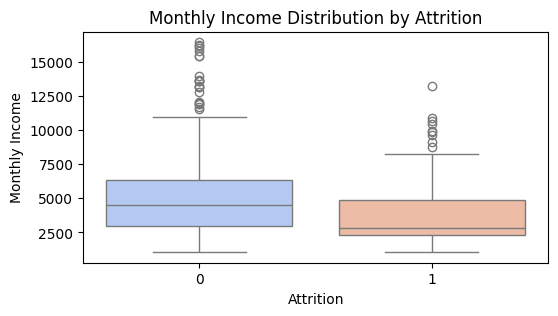

In [ ]:
#Exploratory Data ANalysis

#Attrition vs. salary
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette="coolwarm")
plt.title("Monthly Income Distribution by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

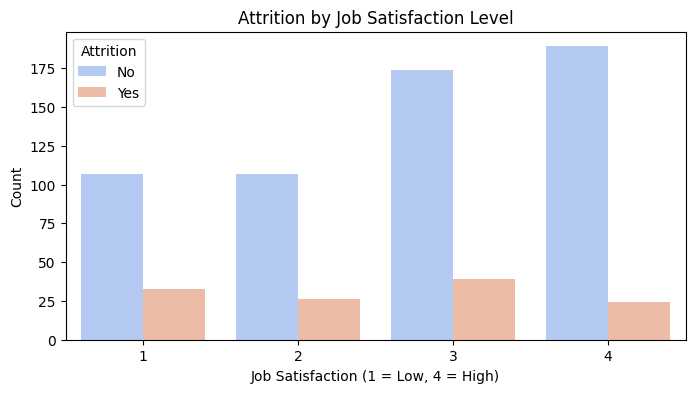

In [20]:
#2️ Attrition vs. Job Satisfaction (Bar Plot)
plt.figure(figsize=(8, 4))
sns.countplot(x=df['JobSatisfaction'], hue=df['Attrition'], palette="coolwarm")
plt.title("Attrition by Job Satisfaction Level")
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()
 

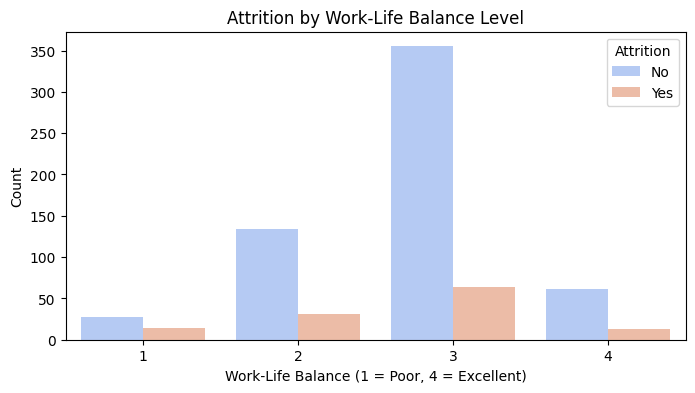

In [21]:
#Work-Life Balance vs. Attrition
plt.figure(figsize=(8, 4))
sns.countplot(x=df['WorkLifeBalance'], hue=df['Attrition'], palette="coolwarm")
plt.title("Attrition by Work-Life Balance Level")
plt.xlabel("Work-Life Balance (1 = Poor, 4 = Excellent)")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

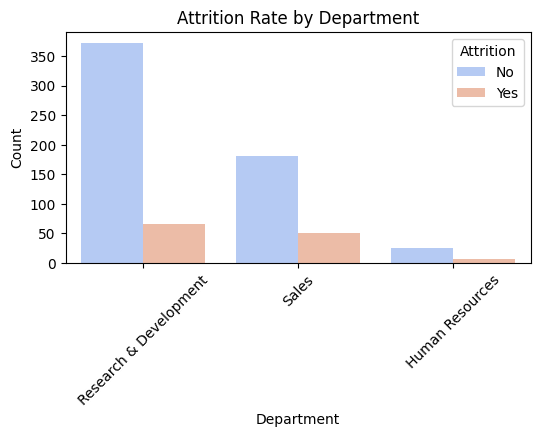

In [22]:
#attrition by department
plt.figure(figsize=(6, 3))
sns.countplot(x=df['Department'], hue=df['Attrition'], palette="coolwarm")
plt.title("Attrition Rate by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()

In [23]:
#creating new columns
#Engagement score 
df['EngagementScore'] = df['JobSatisfaction'] + df['WorkLifeBalance']
df['Income_Satisfaction'] = df['MonthlyIncome'] * df['JobSatisfaction']
df['Work_Balance_Tenure'] = df['WorkLifeBalance'] * df['YearsAtCompany']
#Performance metrics
df['High_Performer'] = df['PerformanceRating'].apply(lambda x: 1 if x >= 3 else 0)

In [24]:
#Feature Engineering
#Create Tenure Categories

# Creating tenure categories
def categorize_tenure(years):
    if years < 2:
        return "New Employee"
    elif 2 <= years < 5:
        return "Mid-Level"
    elif 5 <= years < 10:
        return "Experienced"
    else:
        return "Senior"

df['TenureCategory'] = df['YearsAtCompany'].apply(categorize_tenure)

# One-hot encode the categorical feature
df = pd.get_dummies(df, columns=['TenureCategory'], drop_first=True)


In [25]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EngagementScore,Income_Satisfaction,Work_Balance_Tenure,High_Performer,TenureCategory_Mid-Level,TenureCategory_New Employee,TenureCategory_Senior
0,37,1,Travel Rarely,1373,Research & Development,2,2,Other,4,4,...,0,0,0,6,6270,0,1,False,True,False
1,33,0,Travel Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,7,3,0,6,8727,24,1,False,False,False
2,32,0,Travel Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,7,3,6,6,12272,14,1,False,False,False
3,29,0,Travel Rarely,153,Research & Development,15,2,Life Sciences,15,4,...,5,0,8,6,12579,27,1,False,False,False
4,31,0,Travel Rarely,670,Research & Development,26,1,Life Sciences,16,1,...,2,4,3,5,8733,10,1,False,False,False


In [ ]:
##Logistic Regression model
import pandas as pd 
df= pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Employee Attrition/Employee-Attrition - Employee-Attrition.csv")
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Avoids dummy variable trap

df_encoded.to_csv("C:/Users/karunya/Documents/Guvi projects/Employee Attrition/Modified_Employee_Data.csv", index=False)


In [10]:
# Identify the correct Attrition column
if 'Attrition_Yes' in df_encoded.columns:
    df_encoded.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True)
elif 'Attrition_No' in df_encoded.columns:
    df_encoded.rename(columns={'Attrition_No': 'Attrition'}, inplace=True)

print("Final Target Column:", df_encoded.columns)


Final Target Column: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'J

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Load final dataset
df = df_encoded

# Define features & target
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & Evaluate
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8503401360544217


c:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


c:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Accuracy: 0.850
Precision: 0.714
Recall: 0.106
F1 Score: 0.185

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       247
        True       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294



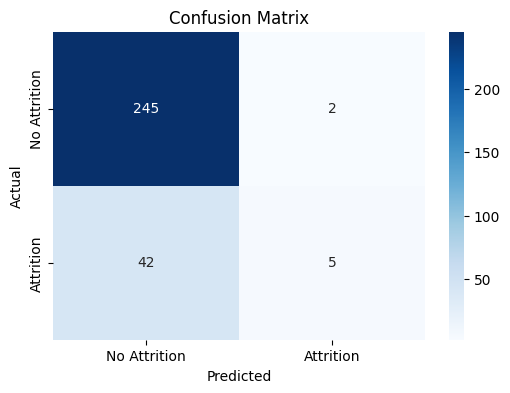

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Print detailed classification report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.830
Precision: 0.364
Recall: 0.085
F1 Score: 0.138

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.91       247
        True       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



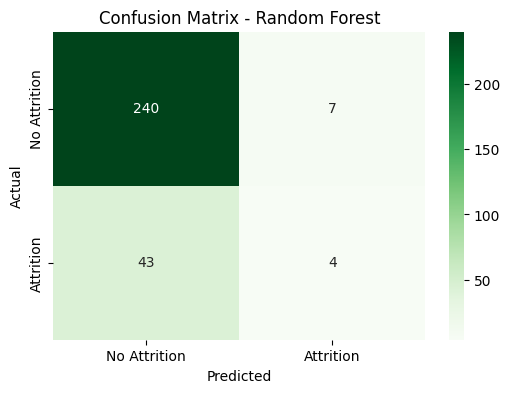

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Attrition", "Attrition"],
            yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


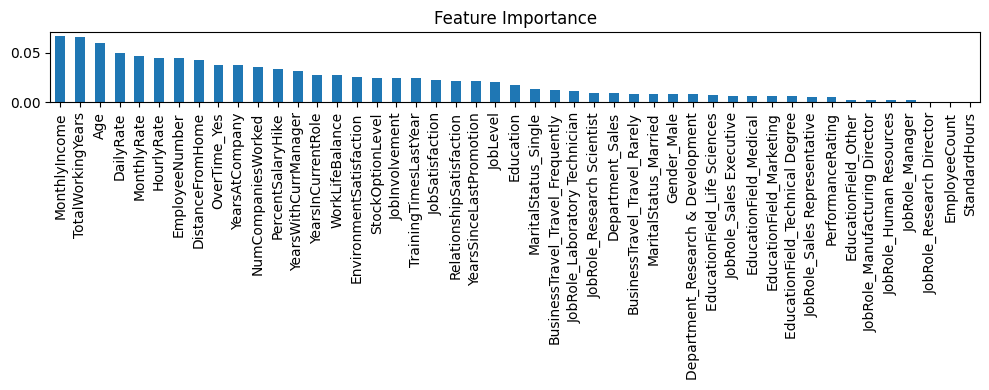

In [ ]:
import pandas as pd


feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title='Feature Importance')
plt.tight_layout()
plt.show()


 Accuracy: 0.803
 Precision: 0.388
 Recall: 0.404
 F1 Score: 0.396

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.88      0.88       247
        True       0.39      0.40      0.40        47

    accuracy                           0.80       294
   macro avg       0.64      0.64      0.64       294
weighted avg       0.81      0.80      0.80       294



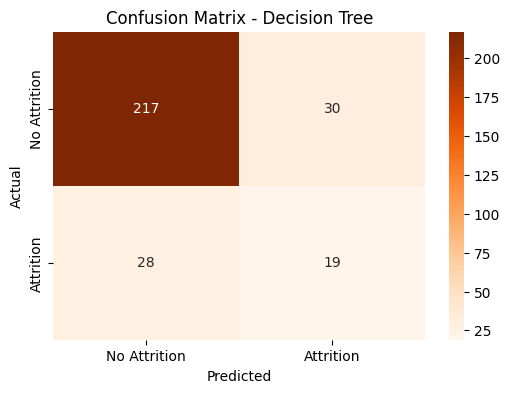

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f" Accuracy: {accuracy:.3f}")
print(f" Precision: {precision:.3f}")
print(f" Recall: {recall:.3f}")
print(f" F1 Score: {f1:.3f}")


print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No Attrition", "Attrition"],
            yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [ ]:
#Best Recall (0.404): Catches ~40% of attrition cases
#Balanced Precision (0.388): Reasonable rate of false positives
#Highest F1 for "True" class

c:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:43:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.864
✅ Precision: 0.836
✅ Recall: 0.864
✅ F1 Score: 0.843

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       255
        True       0.47      0.23      0.31        39

    accuracy                           0.86       294
   macro avg       0.68      0.60      0.62       294
weighted avg       0.84      0.86      0.84       294



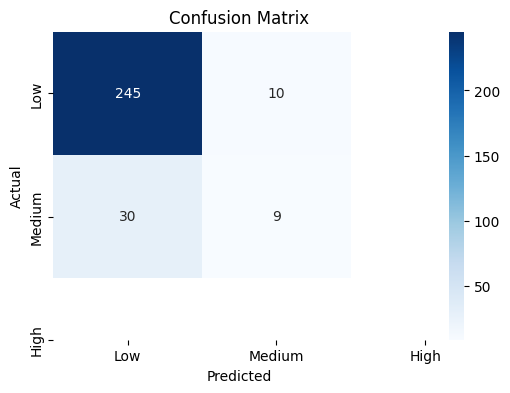

In [ ]:
#XGBoost for PerformanceRating Classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Use softmax for multiclass classification
    num_class=3,  # Set to the number of performance categories you have (e.g., 3: low, medium, high)
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    eval_metric='mlogloss',  
    use_label_encoder=False
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Print detailed classification report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Linear Regression for Job satisfaction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")


Mean Absolute Error: 0.246
Mean Squared Error: 0.106
R-squared: 0.075


In [24]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")


Mean Absolute Error: 0.221
Mean Squared Error: 0.221
R-squared: -0.922
